In [45]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

In [23]:
C = web.DataReader('C', 'yahoo',start, end)
GS = web.DataReader('GS', 'yahoo',start, end)
JPM = web.DataReader('JPM', 'yahoo',start, end)
MS = web.DataReader('MS', 'yahoo',start, end)
WFC = web.DataReader('WFC', 'yahoo',start, end)

In [24]:
tickers = [ 'BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [25]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [29]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [30]:
bank_stocks.xs(key='Close', axis=1, level="Stock Info").max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [31]:
returns = pd.DataFrame()
for i in tickers:
    returns[i + ' Return'] = bank_stocks[i]['Close'].pct_change()

In [32]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


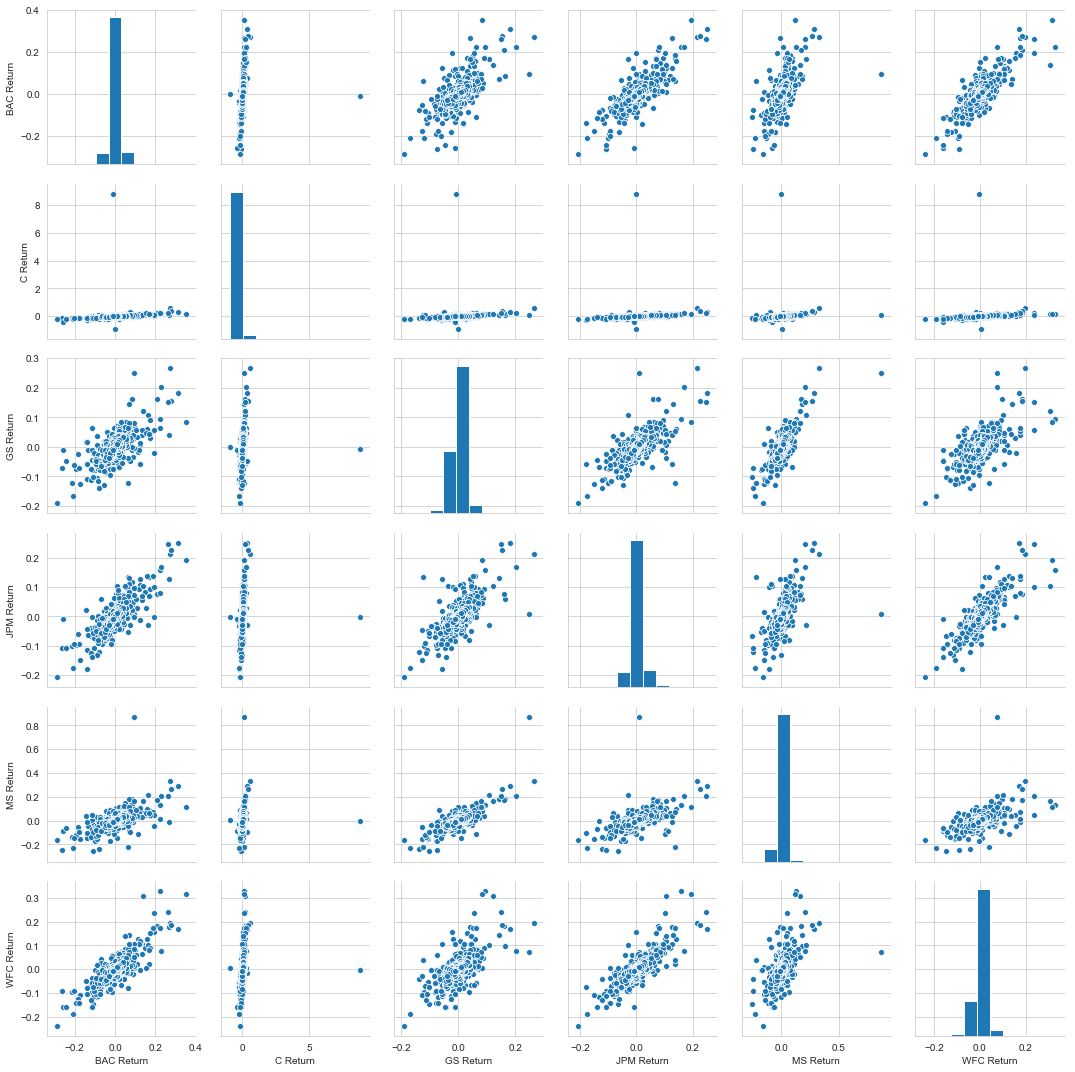

In [34]:
import seaborn as sns
sns.set_style('whitegrid')
sns.pairplot( returns[1:] )

 - We notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [35]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [36]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [37]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [38]:
returns['2015'].std() 

# MS was riskiest?

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [39]:
returns['MS Return']['2015']

Date
2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
2015-01-09   -0.016271
2015-01-12   -0.013829
2015-01-13   -0.009348
2015-01-14   -0.022759
2015-01-15   -0.017893
2015-01-16    0.008965
2015-01-20   -0.004013
2015-01-21   -0.000576
2015-01-22    0.023035
2015-01-23   -0.010695
2015-01-26   -0.001138
2015-01-27   -0.012817
2015-01-28   -0.025678
2015-01-29    0.017767
2015-01-30   -0.016293
2015-02-02    0.018042
2015-02-03    0.018013
2015-02-04   -0.007705
2015-02-05    0.004602
2015-02-06    0.024621
2015-02-09   -0.004471
2015-02-10    0.014875
2015-02-11    0.005808
2015-02-12    0.014572
2015-02-13   -0.003252
                ...   
2015-11-18    0.019649
2015-11-19   -0.002336
2015-11-20   -0.007609
2015-11-23   -0.007962
2015-11-24   -0.001486
2015-11-25    0.000595
2015-11-27    0.005058
2015-11-30    0.015394
2015-12-01    0.028280
2015-12-02   -0.010774
2015-12-03   -0.012611
2015-12-04    0.025254
2015-1

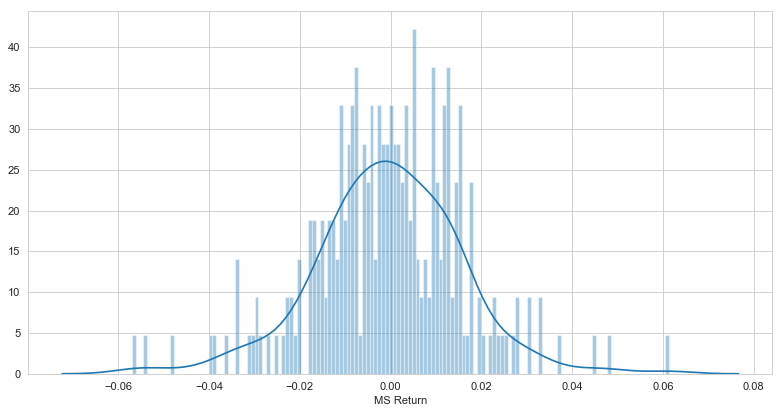

In [49]:
fig = plt.figure(figsize=(12, 6),dpi=80)
sns.distplot(returns['MS Return']['2015'], bins=140)

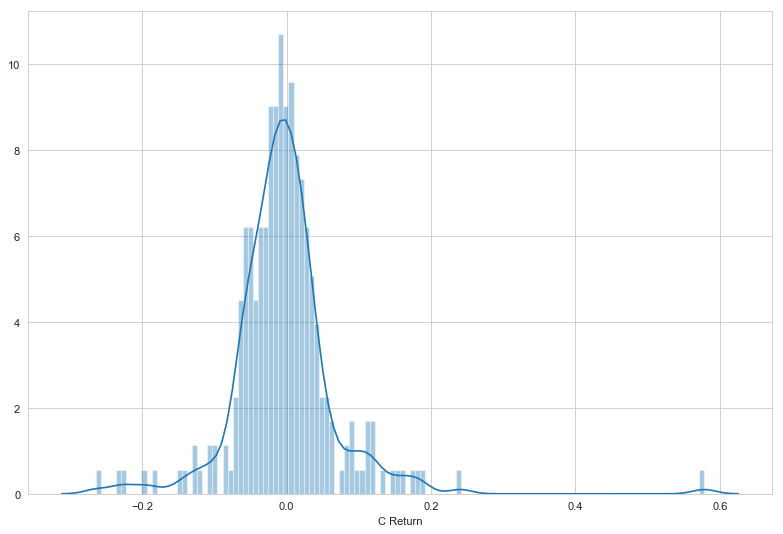

In [50]:
#Create a distplot using seaborn of the 2008 returns for CitiGroup
fig = plt.figure(figsize=(12, 8),dpi=80)
sns.distplot(returns['C Return']['2008'], bins=120 )

In [51]:
import plotly
import cufflinks as cf
cf.go_offline()

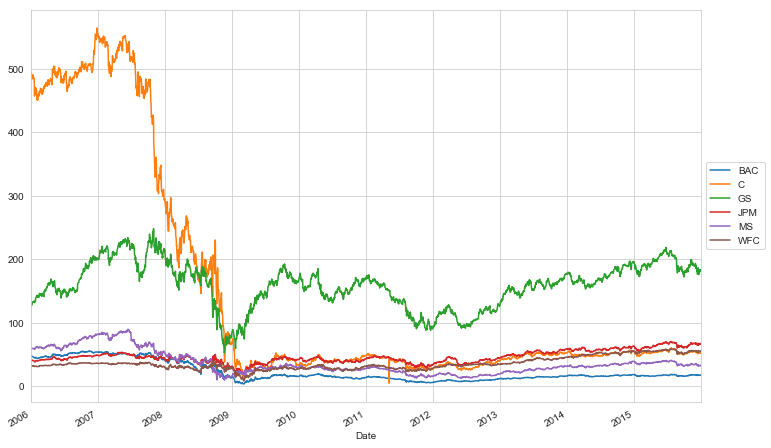

In [56]:
for i in tickers:
  bank_stocks[i]['Close'].plot.line( figsize=(12,8), label=i )
plt.legend( loc='center left', bbox_to_anchor=(1.0, 0.5))

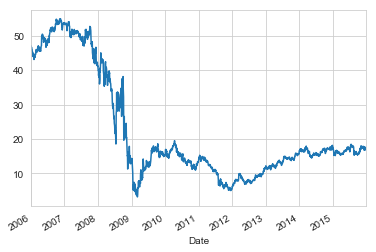

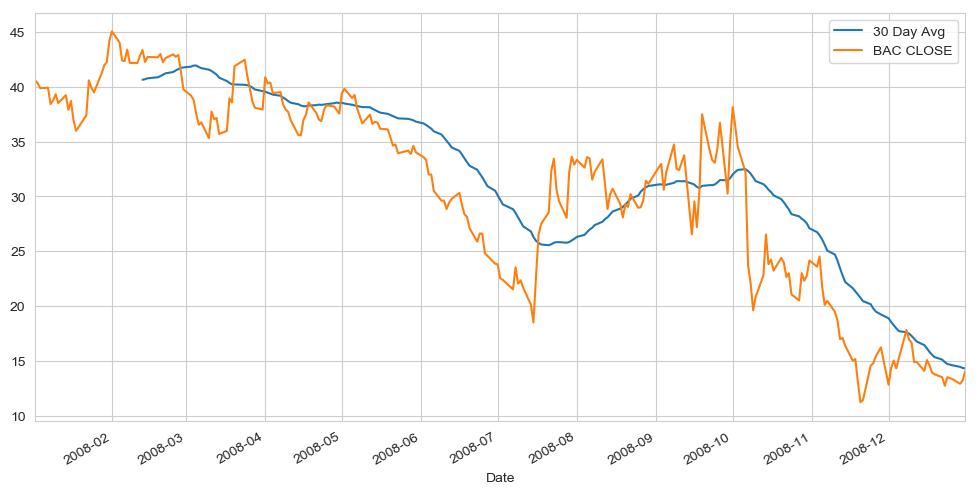

In [58]:
# Moving Averages for stocks in the year 2008


# Rolling 30 day average against the Close Price for Bank Of America's stock.
bank_stocks['BAC']['Close'].plot.line( label=i )


plt.figure(figsize=(12,6),dpi=100)
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

In [59]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

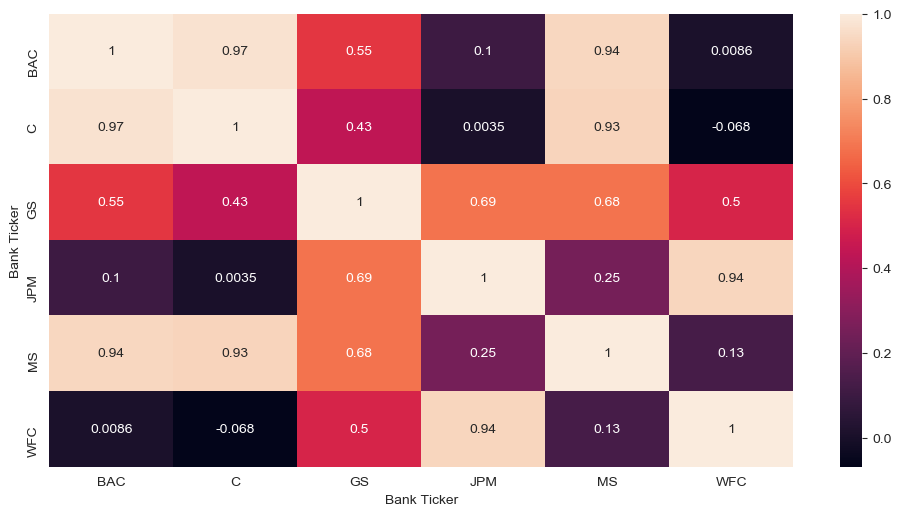

In [61]:
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

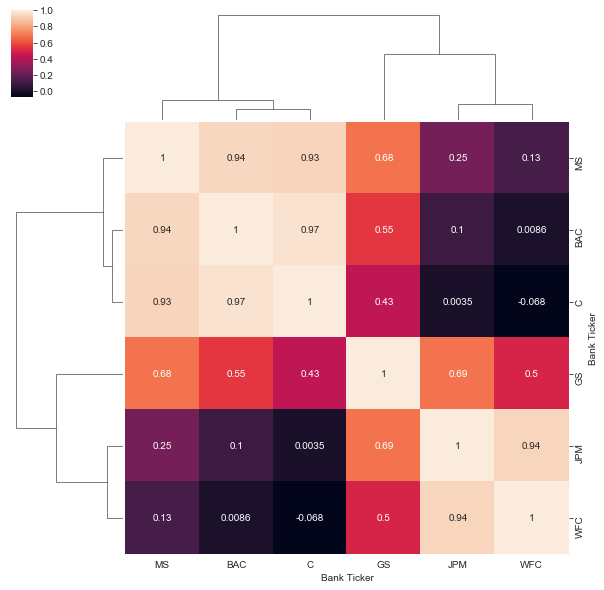

In [62]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [63]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [64]:
bank_stocks['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [65]:
# Simple Moving Averages plot of Morgan Stanley for the year 2015.

bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],
                                                                  title='Simple Moving Averages')

In [66]:
# A Bollinger Band Plot for Bank of America for the year 2015.
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')